In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

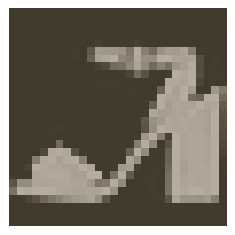

In [10]:
image, label = next(iter(trainloader))
helper.imshow(image[32,:])

In [21]:
len(label)

64

In [5]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [47]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        self.outputs = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1) # --> inputs data must be flatten
        
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = F.log_softmax(self.outputs(x), dim=1)
        
        return x

    

In [48]:
model = Network()
criterion = nn.NLLLoss() # Negative Log-Likelihood Loss --> L(y) = -log(y)
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [49]:
model

Network(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (outputs): Linear(in_features=64, out_features=10, bias=True)
)

In [50]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(image)
        loss = criterion(log_ps, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print("Training loss: {}".format(running_loss/len(trainloader)))

Training loss: 0.01577532610510606
Training loss: 2.5121754794960144e-06
Training loss: 9.208714957313864e-07
Training loss: 4.2040098174511163e-07
Training loss: 2.1222055603768652e-07


In [35]:
len(trainloader)

938

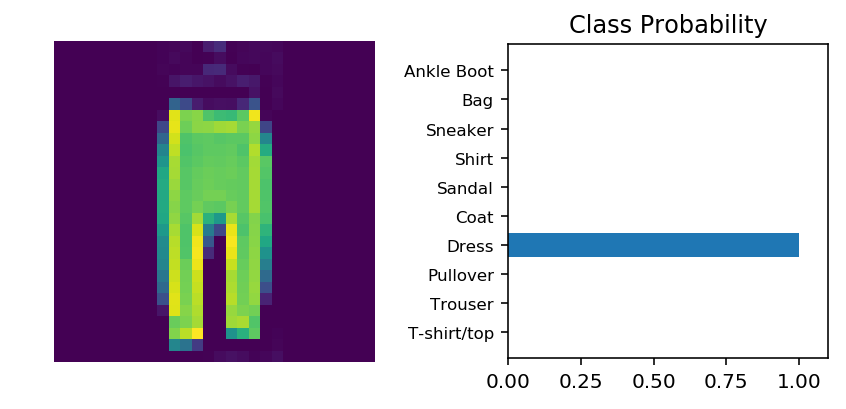

In [42]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[4]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')